In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random,tempfile
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) 
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
print("The Length of the X_train is ",len(X_train))
print("The Length of the X_test is ",len(X_test))


The Length of the X_train is  60000
The Length of the X_test is  10000


In [9]:
W_grid = 4
L_grid = 4

In [10]:
class_names = ['T_Shirts','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle_Boot']

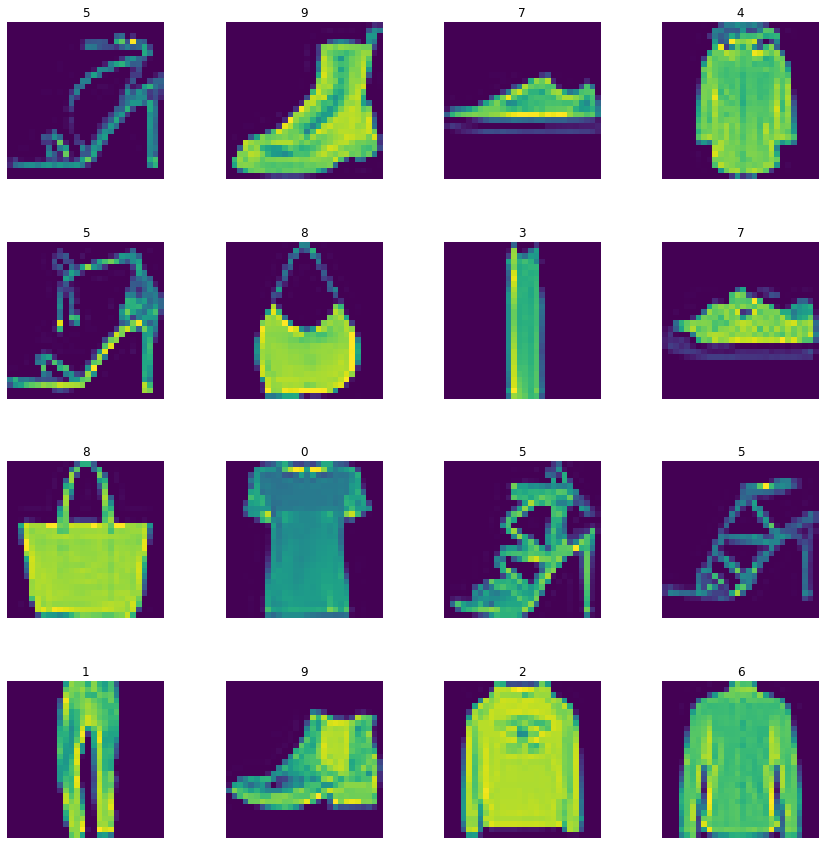

In [11]:
fig,axes = plt.subplots(L_grid,W_grid,figsize=(15,15))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0,W_grid * L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index].reshape(28,28))
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='valid',input_shape = (28,28,1)))

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(2,2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu',use_bias=True))

In [17]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
epoches = 5
cnn.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train,epochs=epoches)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4151 - accuracy: 0.8541
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2797 - accuracy: 0.8995
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2380 - accuracy: 0.9134
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2082 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1853 - accuracy: 0.9309


In [21]:
test_loss,test_acc = cnn.evaluate(X_train,y_train,verbose=1)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1501 - accuracy: 0.9459


In [22]:
print("The Test Accuracy is ",test_acc)

The Test Accuracy is  0.945900022983551


In [23]:
print("The Test Loss is ",test_loss)

The Test Loss is  0.15012449026107788


In [24]:
import tempfile

In [25]:
Model = tempfile.gettempdir()

In [26]:
print(Model)

/tmp


In [27]:
version = 1

In [28]:
export_path = os.path.join(Model,str(version))

In [29]:
print("The Export Path of the the ",export_path)

The Export Path of the the  /tmp/1


In [30]:
cnn.save('model1.h5')

In [31]:
from tensorflow.keras.models import load_model

In [32]:
new_model = load_model('model1.h5')

In [33]:
print(new_model)

In [34]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tensorflow-model-server


In [35]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [36]:
pred = new_model.predict(X_test)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


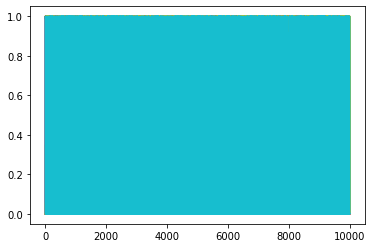

In [38]:
plt.plot(pred)

In [39]:
df = pd.DataFrame(pred)

In [40]:
print(df.columns)

RangeIndex(start=0, stop=10, step=1)


In [41]:
print(df)

                 0             1  ...             8             9
0     1.322850e-05  4.481147e-08  ...  2.379701e-05  9.978732e-01
1     7.850808e-05  5.230361e-10  ...  2.772278e-09  1.021934e-12
2     1.750717e-07  9.999998e-01  ...  1.662674e-10  9.048321e-15
3     4.143480e-07  9.999937e-01  ...  7.261410e-11  1.372702e-12
4     1.322441e-01  6.303522e-06  ...  5.488171e-06  1.662674e-06
...            ...           ...  ...           ...           ...
9995  2.234897e-07  7.173598e-11  ...  2.398439e-08  9.999825e-01
9996  1.238415e-05  9.998167e-01  ...  2.524864e-08  1.042237e-09
9997  6.833152e-06  2.717187e-10  ...  9.999456e-01  4.874300e-10
9998  1.282749e-08  9.999971e-01  ...  9.030257e-09  4.696432e-12
9999  3.181343e-04  1.024205e-06  ...  6.739439e-03  3.247884e-04

[10000 rows x 10 columns]
